In [ ]:
install.packages("dplyr")
install.packages("ISLR")

In [ ]:
library(ISLR)
library(dplyr)
data(Auto)

[1] 1.197901

[1] 1.198921

[1] 0.08345391

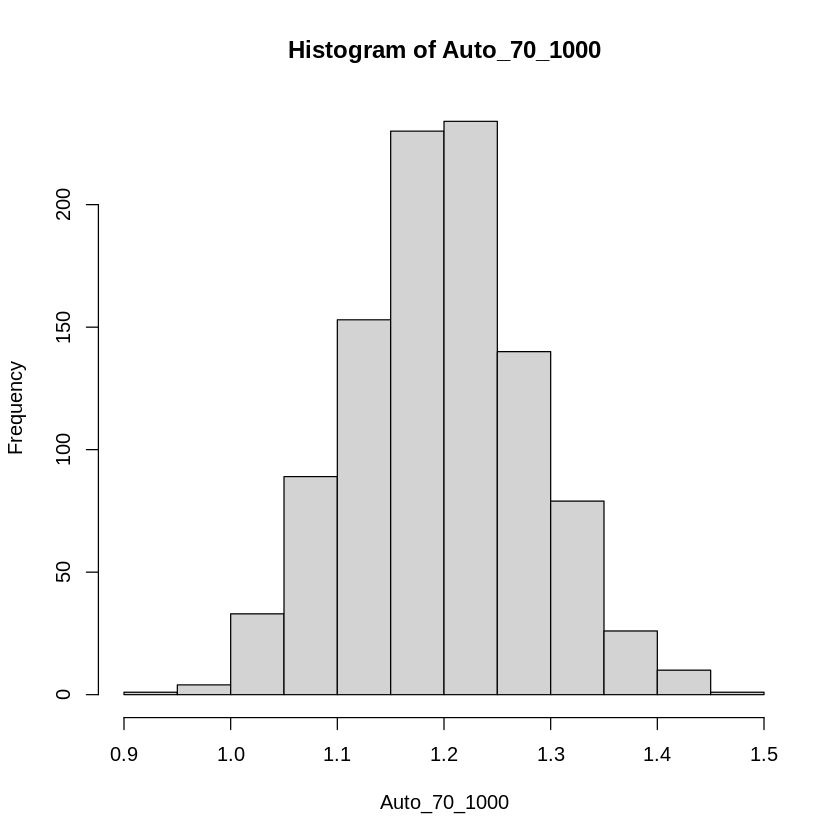

In [8]:
getSlope = function(xy = Auto){
  
  fit = lm(mpg ~ acceleration, data = xy)
  return(coef(fit)[2])
  
}
set.seed(123)
Auto_70_1000 <- replicate(1000, getSlope(Auto[sample(1:nrow(Auto), nrow(Auto) * 0.7), ]))
hist(Auto_70_1000)

mean(Auto_70_1000)
median(Auto_70_1000)
sd(Auto_70_1000)

In [9]:
Auto70 = Auto[sample(1:nrow(Auto), nrow(Auto)*70/100),]

Auto_70_10001 <- replicate(
  n = 1000,
  expr = {
      Auto70 = slice_sample(Auto70, prop = 1, replace = TRUE) %>% getSlope() })

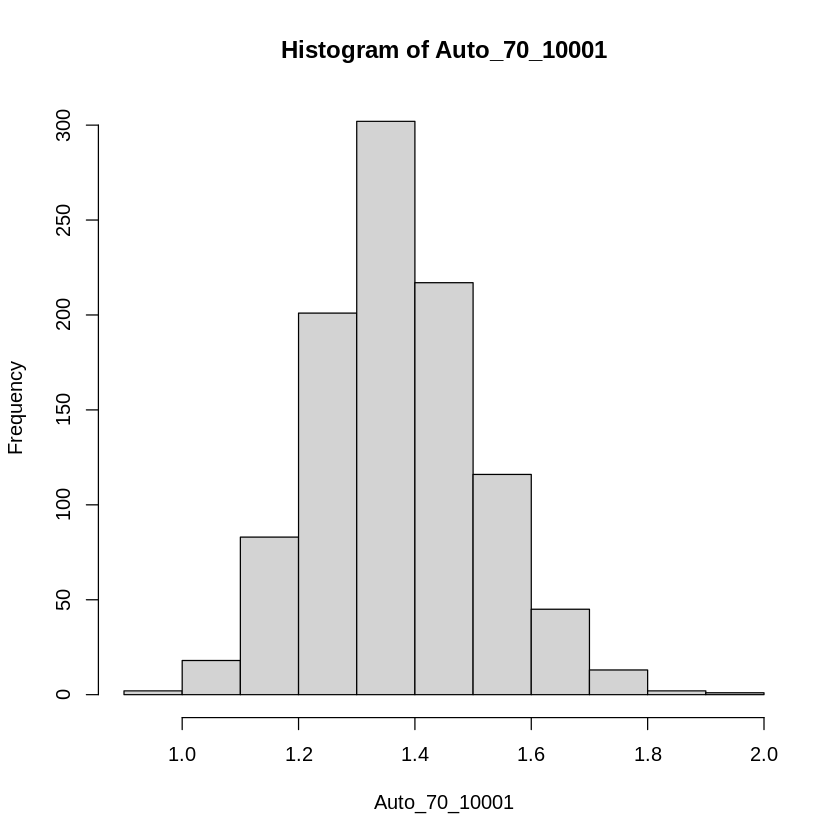

In [10]:
hist(Auto_70_10001)

In [11]:
fit = lm(mpg ~ acceleration, data = Auto)

se = summary(fit)$coefficients["acceleration","Std. Error"]
se

std = sd(Auto_70_10001)
std

c(quantile(Auto_70_10001, 0.975) , quantile(Auto_70_10001, 0.025))

mean(Auto_70_10001)
median(Auto_70_10001)
sd(Auto_70_10001)

[1] 0.1297859

[1] 0.1404563

97.5%     2.5% 
1.649462 1.105886

[1] 1.371998

[1] 1.366799

[1] 0.1404563